# Install Finesse

In [1]:
%%capture
!pip install finesse

# Import Finesse

In [2]:
import finesse
finesse.configure(plotting=True)

#Measuring transfer function

<img src="https://finesse.ifosim.org/docs/develop/_images/radiation_pressure.svg" width="400"/>

In [3]:
suspended_mirror = finesse.Model()
suspended_mirror.parse(
    """
    # Optical setup: laser, space and mirror:
    l l1 P=1
    s s1 l1.p1 m1.p1 L=1
    m m1 R=1 T=0

    # Define a pendulum for our mirror, with a z-motion resonance at 10Hz
    # and Q factor of 1000
    pendulum sus1 m1.mech mass=1 fz=10 Qz=1000

    # Measure the mirror's longitudinal motion
    xd m1_z m1.mech.z
    """
)

Pendulum is one of the few mechanical models available in Finesse. Note here that we are also using a new detector called positions detectors `xd`. We want to calculate the response of the supended mirror for modulated laser power as a function of frequency.

To model a transfer function in Finesse there is a specfic recipe one must follow. The steps of this recipe are:

**Initiate a signal simulation**: Add an `fsig(1)` command to tell Finesse to run a 'signal simulation'. This creates a signal called `fsig` with an initial frequency of  1  Hz.

**Apply an input signal:** Add a signal generator `sgen` to the injection node, e.g., `sgen sig laser.amp`, which injects the signal into the laser amplitude.

**Measure the output signal:** Add a detector to demodulate this signal, e.g. `pd1 tf s1.p1.i f=fsig.f`. This measures the signal we added before.

**Sweep the frequency of the input signal:** To scan the signal frequency we can use `xaxis(fsig.f, log, 1e4, 1e9, 1000)`. This allows us to see how our detector responds to different frequencies.

Using the above reciepe, we are going to calcualte the response of the mirror to external disturbances.

In [4]:
suspended_mirror.parse(
    """

    # Set a signal frequency to activate the signal simulation
    # (needed for radiation pressure effects to be observed)
    fsig(1)

    # Generate amplitude modulation at the laser
    sgen sig l1.amp

    # Sweep the frequency of the amplitude modulation
    xaxis(fsig.f, log, 1, 100, 400)
    """
)

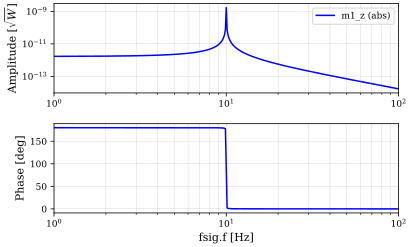

In [5]:
out = suspended_mirror.run()
out.plot(log=True);

# <font color='blue'> TASK: Change the Q value of pendulum to 1e5 and make the response plot again. What do we see? <font>